# Group Project 1: Telecom Churn Case

In [1]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
churn_data = pd.read_csv("Telecom_churn_data.csv")
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# 1 Finding High Value Clients

In [3]:
# Find and Replacing null values by zero
churn_data['total_rech_amt_6'] = churn_data['total_rech_amt_6'].fillna(0)
churn_data['total_rech_num_6'] = churn_data['total_rech_num_6'].fillna(0)
churn_data['total_rech_amt_7'] = churn_data['total_rech_amt_7'].fillna(0)
churn_data['total_rech_num_7'] = churn_data['total_rech_num_7'].fillna(0)

In [4]:
# Finding the Average Amounts for Month 6
conditions = [
    (churn_data['total_rech_amt_6'] == 0) | (churn_data['total_rech_num_6'] == 0),
    (churn_data['total_rech_amt_6'] != 0) & (churn_data['total_rech_num_6'] != 0)
]
choices = [0, churn_data["total_rech_amt_6"]/churn_data["total_rech_num_6"]]
churn_data['av_rech_amt_6'] = np.select(conditions, choices, default=0)

In [5]:
# Finding the Average Amounts for Month 7
conditions = [
    (churn_data['total_rech_amt_7'] == 0) | (churn_data['total_rech_num_7'] == 0),
    (churn_data['total_rech_amt_7'] != 0) & (churn_data['total_rech_num_7'] != 0)
]
choices = [0, churn_data["total_rech_amt_7"]/churn_data["total_rech_num_7"]]
churn_data['av_rech_amt_7'] = np.select(conditions, choices, default=0)

In [6]:
# Find and Replacing null values with zero
churn_data['av_rech_amt_data_6'] = churn_data['av_rech_amt_data_6'].fillna(0)
churn_data['av_rech_amt_data_7'] = churn_data['av_rech_amt_data_7'].fillna(0)

In [7]:
# Finding the Total Recharge Amount for Months 6 & 7
churn_data["total_rech_6_7"] = churn_data["av_rech_amt_6"] + churn_data["av_rech_amt_7"] + churn_data["av_rech_amt_data_6"] + churn_data["av_rech_amt_data_7"]

In [8]:
# Finding 70th percentile value of the field "total_rech_6_7"
high_value_benchmark = churn_data.total_rech_6_7.quantile(0.7)

In [9]:
# Keeping only those rows which have values of the field "total_rech_6_7" greater than the 70th percentile
churn_data_high = churn_data[churn_data['total_rech_6_7'] > high_value_benchmark]
churn_data_high = churn_data_high.drop(['av_rech_amt_6','av_rech_amt_7', 'total_rech_6_7'],axis=1)
churn_data_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 52.0+ MB


## 2: Invoking churn on month 9

In [10]:
conditions = [
    (churn_data_high['total_ic_mou_9'] == 0) & (churn_data_high['total_og_mou_9'] == 0) & (churn_data_high['vol_2g_mb_9'] == 0) & (churn_data_high['vol_3g_mb_9'] == 0),
    (churn_data_high['total_ic_mou_9'] != 0) | (churn_data_high['total_og_mou_9'] != 0) | (churn_data_high['vol_2g_mb_9'] != 0) | (churn_data_high['vol_3g_mb_9'] != 0)
]
choices = [1, 0]
churn_data_high['Churn'] = np.select(conditions, choices, default=0)

In [11]:
churn_data_high = churn_data_high.drop(['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'], axis=1)
churn_data_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Columns: 223 entries, mobile_number to Churn
dtypes: float64(175), int32(1), int64(35), object(12)
memory usage: 51.2+ MB


In [12]:
# Checking if Churn Flag has an Nan values
churn_data_high[np.isnan(churn_data_high['Churn'])]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn


#### This shows that there are valid values in the Churn flag for all data rows

## 3 Data Cleanup

In [13]:
# Remove the date columns
churn_data_numeric = churn_data_high.select_dtypes(['number'])
churn_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Columns: 211 entries, mobile_number to Churn
dtypes: float64(175), int32(1), int64(35)
memory usage: 48.4 MB


In [14]:
# Checking the percentage of missing values
round(100*(churn_data_numeric.isnull().sum()/len(churn_data_numeric.index)), 2).sort_values(ascending=False)

count_rech_2g_9       42.62
night_pck_user_9      42.62
count_rech_3g_9       42.62
av_rech_amt_data_9    42.62
max_rech_data_9       42.62
arpu_3g_9             42.62
arpu_2g_9             42.62
total_rech_data_9     42.62
fb_user_9             42.62
count_rech_3g_8       39.26
count_rech_2g_8       39.26
av_rech_amt_data_8    39.26
arpu_2g_8             39.26
night_pck_user_8      39.26
max_rech_data_8       39.26
fb_user_8             39.26
total_rech_data_8     39.26
arpu_3g_8             39.26
night_pck_user_6      31.52
total_rech_data_6     31.52
count_rech_3g_6       31.52
fb_user_6             31.52
arpu_2g_6             31.52
arpu_3g_6             31.52
max_rech_data_6       31.52
count_rech_2g_6       31.52
arpu_2g_7             30.93
max_rech_data_7       30.93
count_rech_2g_7       30.93
arpu_3g_7             30.93
                      ...  
aug_vbc_3g             0.00
jul_vbc_3g             0.00
jun_vbc_3g             0.00
vol_2g_mb_8            0.00
vol_2g_mb_7         

In [15]:
# Remove columns with 30% missing values
churn_data_numeric_cleaning = churn_data_numeric.loc[:, churn_data_numeric.isnull().mean() <= .3]
round(100*(churn_data_numeric_cleaning.isnull().sum()/len(churn_data_numeric_cleaning.index)), 2).sort_values(ascending=False)

loc_ic_t2t_mou_9      7.28
ic_others_9           7.28
og_others_9           7.28
loc_og_t2t_mou_9      7.28
loc_og_t2m_mou_9      7.28
loc_og_t2f_mou_9      7.28
loc_og_t2c_mou_9      7.28
loc_ic_t2m_mou_9      7.28
std_og_t2t_mou_9      7.28
loc_og_mou_9          7.28
loc_ic_t2f_mou_9      7.28
roam_ic_mou_9         7.28
isd_ic_mou_9          7.28
spl_ic_mou_9          7.28
loc_ic_mou_9          7.28
std_ic_t2t_mou_9      7.28
std_ic_mou_9          7.28
std_og_t2m_mou_9      7.28
std_ic_t2o_mou_9      7.28
std_ic_t2m_mou_9      7.28
roam_og_mou_9         7.28
std_ic_t2f_mou_9      7.28
offnet_mou_9          7.28
std_og_t2f_mou_9      7.28
isd_og_mou_9          7.28
std_og_mou_9          7.28
std_og_t2c_mou_9      7.28
onnet_mou_9           7.28
spl_og_mou_9          7.28
std_ic_t2m_mou_8      5.18
                      ... 
aug_vbc_3g            0.00
jul_vbc_3g            0.00
jun_vbc_3g            0.00
vol_2g_mb_8           0.00
vol_2g_mb_7           0.00
vol_2g_mb_6           0.00
t

In [16]:
# Impute all remaining null values with 0
churn_data_final = churn_data_numeric_cleaning.fillna(0)

## 4: Split train and test sets

In [17]:
from sklearn.model_selection import train_test_split

X = churn_data_final.drop(['Churn','mobile_number'],axis=1)
y = churn_data_final['Churn']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

## 5: Invoking PCA and Modelling

In [19]:
#  Find PCA object with 90% variance accuracy
from sklearn.decomposition import PCA
pca = PCA(0.90)

In [20]:
# Invoking PCA on the train data
churn_data_train_pca = pca.fit_transform(X_train)
churn_data_train_pca.shape

(21000, 17)

In [21]:
# correlation matrix
corrmat = np.corrcoef(churn_data_train_pca.transpose())

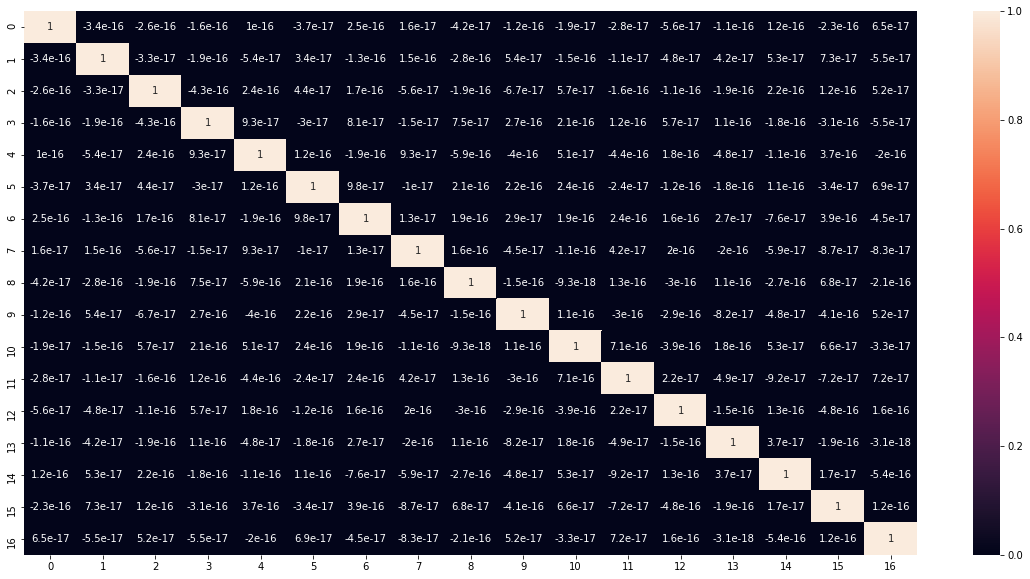

In [22]:
# Plot correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

#### The above plot shows that there is no correlation between the Principal Components. Hence, multi-collinearity in the data has been effectively removed by doing dimensionality reduction using PCA

In [23]:
# execute model using selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
churn_pca_regression = LogisticRegression()
churn_model_pca = churn_pca_regression.fit(churn_data_train_pca, y_train)

C:\Users\MY COMPUTER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
#Invoking PCA on the test data
churn_data_test_pca = pca.transform(X_test)
churn_data_test_pca.shape

(9000, 17)

In [25]:
# Predict on the test data and evaluating the AUROC Score
pred_probs_test = churn_model_pca.predict_proba(churn_data_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.97'

####  Score of 0.97 depicts that model seems to be working well for unknown data